In [81]:
import os
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
# ! StandardScaler só é utilizado quando a distribuição é normal
# ! Isso afeta a busca por outliers

# Data understanding
Empezamos mostrando el tipo de cada columna, observe: La primera columna "Column" indica el nombre, la segunda "Non-null Count" representa la cantidad de valores no nulos y la tercera "Dtype" el tipo de cada columna .

In [82]:
FILE = os.path.abspath('diabetes.csv')
print(FILE)
data = pd.read_csv(FILE)
data.info()

c:\Users\Hugo Martins\PycharmProjects\codes\codes\explotacion\4-anomalias\diabetes.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    770 non-null    int64  
 1   Glucose        770 non-null    float64
 2   BloodPressure  770 non-null    int64  
 3   SkinThickness  770 non-null    int64  
 4   Insulin        770 non-null    int64  
 5   BMI            770 non-null    float64
 6   Diabetes       770 non-null    float64
 7   Age            770 non-null    int64  
 8   Outcome        770 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.3 KB


# Data description
Como podemos ver, aquí tenemos distribuciones de datos en relación a media, desviación estándar, mínimo, máximo y cuartiles.


In [83]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes,Age,Outcome
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,3.884416,120.723403,69.120779,20.620779,79.693506,32.043896,346.336286,33.774026,0.349351
std,3.611626,32.241153,19.323869,16.067691,115.129981,8.047356,254.043735,17.491617,0.477075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,165.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,295.500000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.750000,36.600000,526.750000,41.000000,1.000000
max,40.000000,199.000000,122.000000,99.000000,846.000000,78.000000,997.000000,390.000000,1.000000


Para entender su distribución, se realizaron gráficos de histograma. Es posible interpretar e identificar los tipos que se pueden utilizar de codificadores para que las herramientas de aprendizaje puedan adaptarse a los datos sin perder su información.

En este caso, tenga en cuenta que no tenemos distribuciones gaussianas, por lo que solo es posible usar un escalador del tipo vinculado al intervalo de datos, y no uno vinculado a la desviación estándar como el escalador estándar, de lo contrario perderemos información sobre anomalías, por ejemplo.

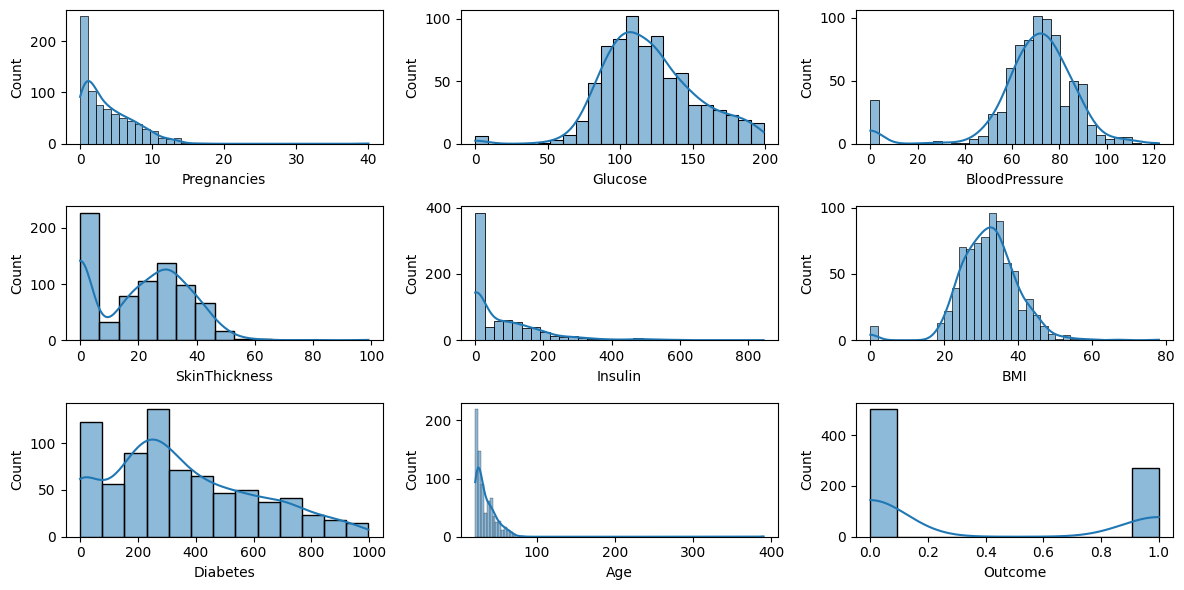

In [84]:
f, axs = plt.subplots(3, 3, figsize=(12, 6))
posit = [(int(x),int(y)) for x in range(3) for y in range(3)]
for i,v in enumerate(data.columns.to_list()):
    sns.histplot(data, x=v, ax=axs[posit[i]], kde=True)
f.tight_layout()

Podemos observar la cantidad y los principales factores vinculados a las anomalías.

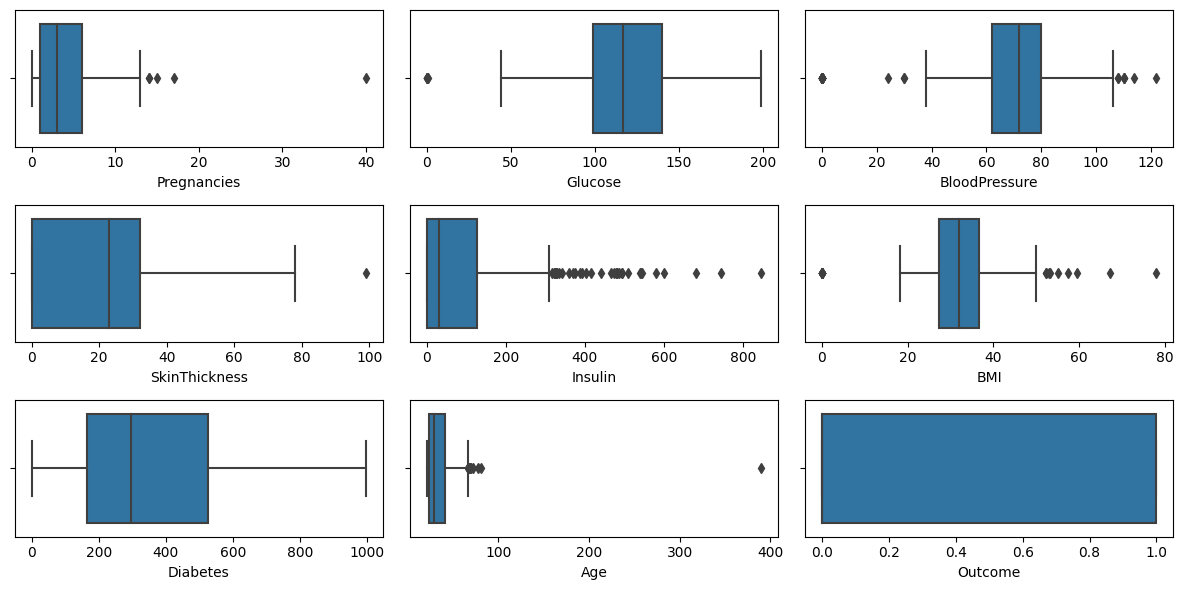

In [85]:
f, axs = plt.subplots(3, 3, figsize=(12, 6))
posit = [(int(x),int(y)) for x in range(3) for y in range(3)]
for i,v in enumerate(data.columns.to_list()):
    sns.boxplot(data, x=v, ax=axs[posit[i]])
f.tight_layout()

# Data Preparation
La preparación de datos consistía únicamente en comprenderlos, detectar datos faltantes y ciertas transformaciones. Como buscamos anomalías, este proceso llega hasta la detección de datos faltantes.

# Modeling
Como estamos buscando anomalías, optamos por no usar SCALER, y no se usaron codificadores porque no tenemos ningún tipo de datos categóricos.

In [86]:
lof = LocalOutlierFactor()
y_pred = pd.DataFrame(lof.fit_predict(data), columns=['Outliers'])
data_out = pd.concat([data,y_pred], axis=1)

Encontramos 33 valores atípicos, y aquí se describen.

In [87]:
data_out[data_out.Outliers == -1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes,Age,Outcome,Outliers
13,1,189.00,60,23,846,30.1,398.000,59,1,-1
49,7,105.00,0,0,0,0.0,305.000,24,0,-1
75,1,0.00,48,20,0,24.7,0.140,22,0,-1
78,0,131.00,0,0,0,43.2,0.270,26,1,-1
81,2,74.00,0,0,0,0.0,102.000,22,0,-1
117,5,78.00,78,78,78,78.0,78.000,78,0,-1
153,1,153.00,82,42,485,40.6,687.000,23,0,-1
182,1,0.00,74,20,23,27.7,299.000,21,0,-1
199,4,148.00,60,27,318,30.9,0.150,29,1,-1
220,0,177.00,60,29,478,34.6,1.072,21,1,-1


Realmente no sabía cómo visualizar las anomalías, así que adiviné algunos gráficos.

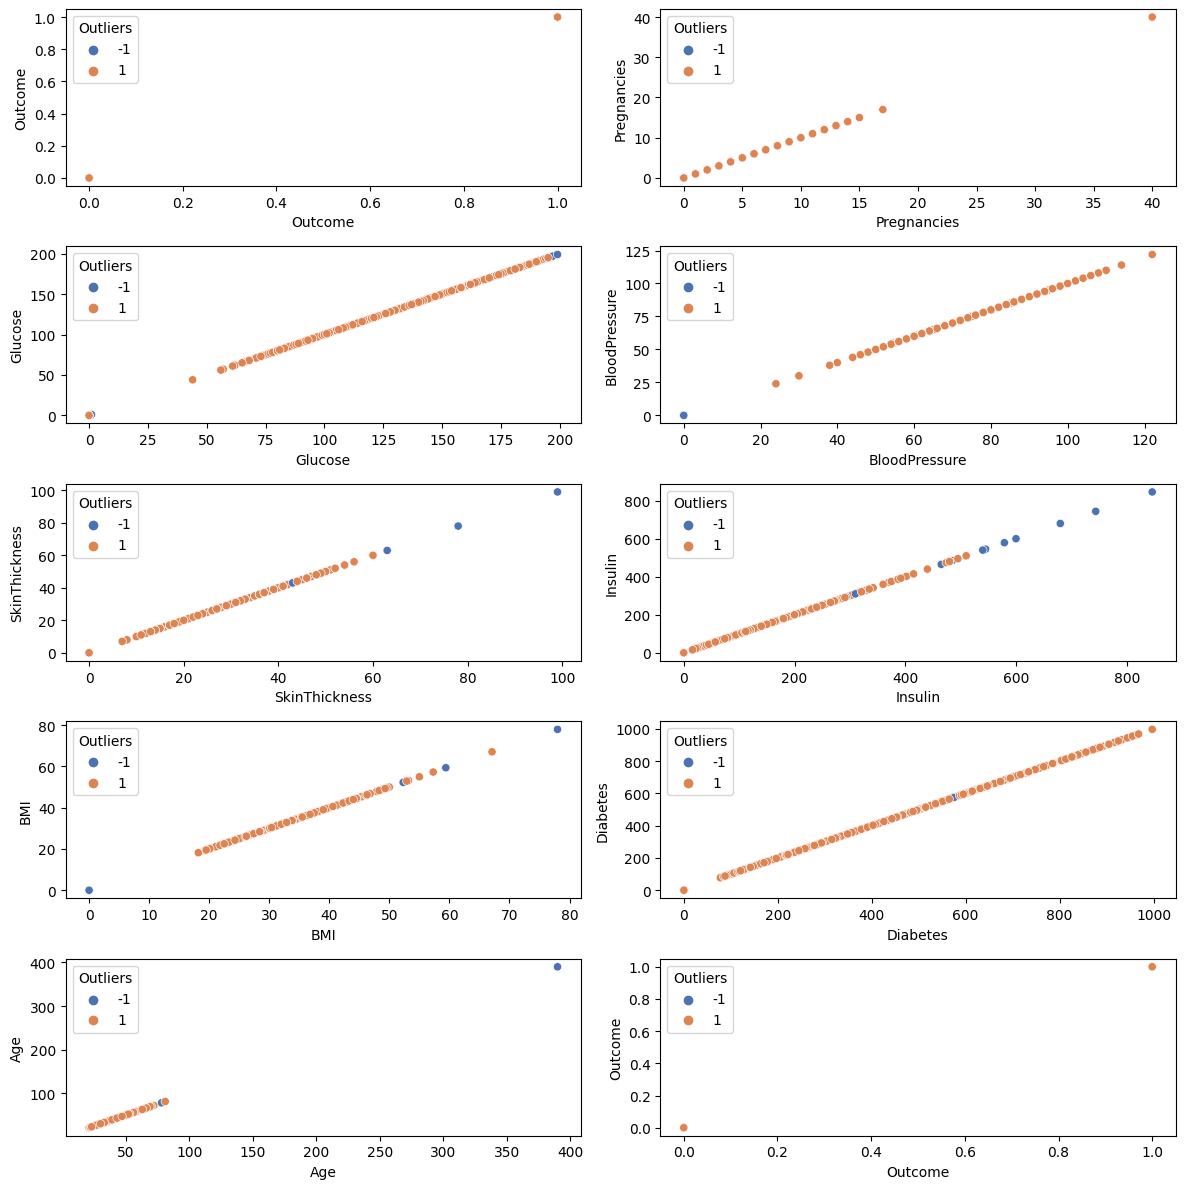

In [95]:
f, axs = plt.subplots(5, 2, figsize=(12, 12))
posit = [(int(x),int(y)) for x in range(5) for y in range(2)]
columns = data.columns.to_list()
for i,v in enumerate(posit):
    sns.scatterplot(data_out, x=columns[i-1], y=columns[i-1], ax=axs[v], 
                    hue='Outliers', palette='deep')
f.tight_layout()

# Evaluation
Se creó un árbol de decisión para comprender exactamente cómo se determinaron los intervalos considerados anómalos.

In [89]:
rfc = RandomForestClassifier()
rfc.fit(data_out.iloc[:,:9], data_out['Outliers'])

RandomForestClassifier()

Este es el árbol de decisión completo. Sin procesamiento previo del árbol de decisión.

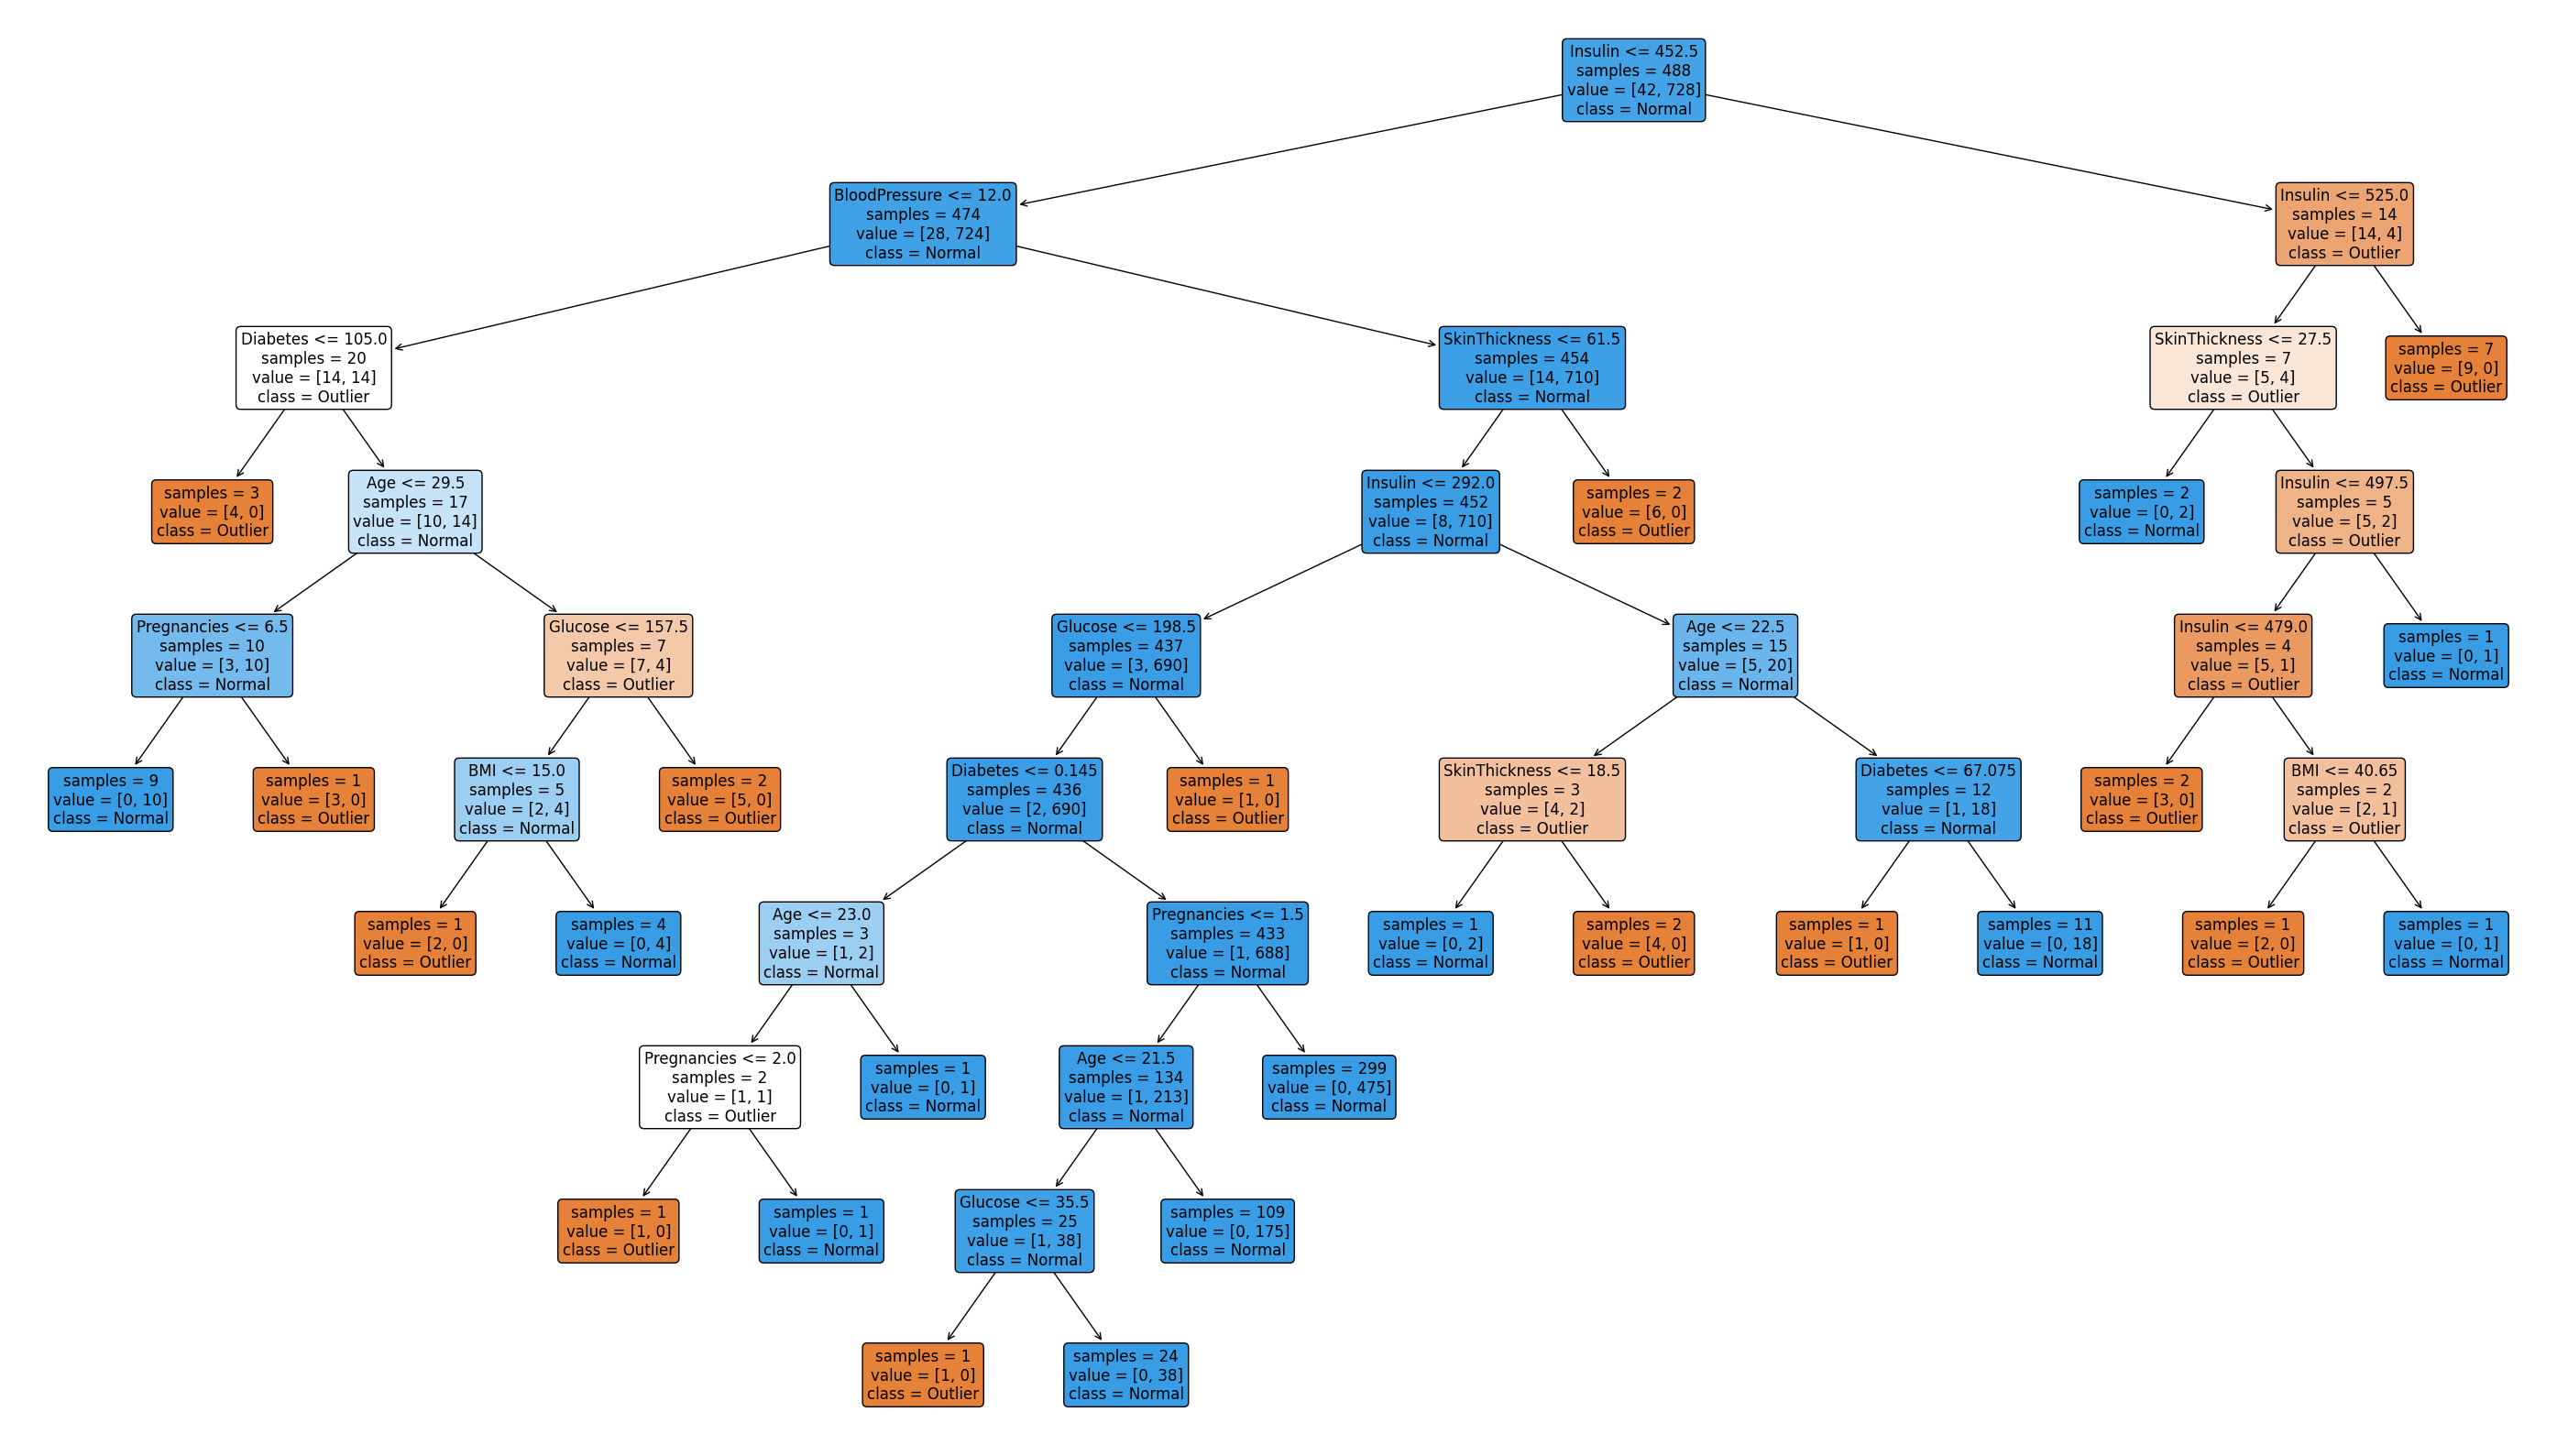

In [90]:
fig = plt.figure(figsize=(28, 16))
plot_tree(rfc.estimators_[0], 
          feature_names=data.columns.to_list(),
          class_names=('Outlier','Normal'),
          filled=True, rounded=True, impurity=False, fontsize=12)
fig.tight_layout()

Para una mejor visualización, y considerando que solo 7 de los 9 campos obtuvieron datos anómalos (ver boxplots), se utilizó un árbol de decisión con una profundidad máxima de 6 decisiones.

In [91]:
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(data_out.iloc[:,:9], data_out['Outliers'])

RandomForestClassifier(max_depth=6)

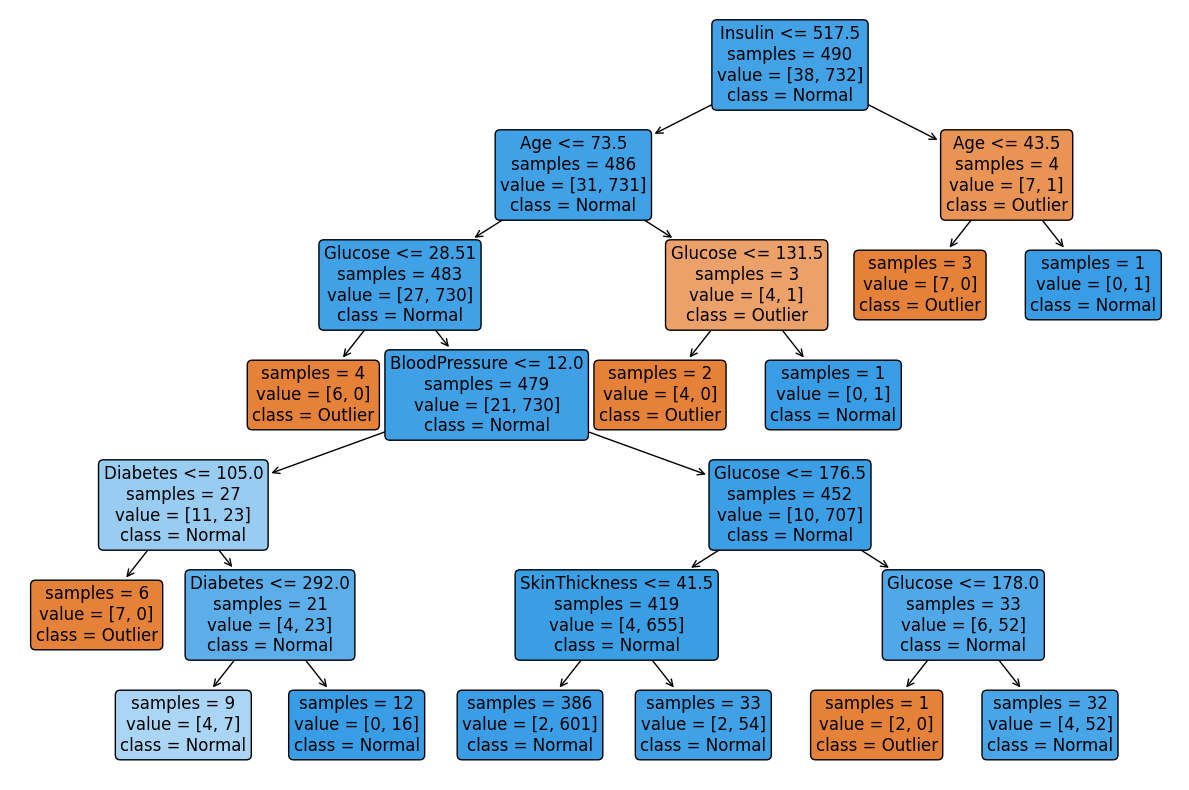

In [92]:
fig = plt.figure(figsize=(12, 8))
plot_tree(rfc.estimators_[0], 
          feature_names=data.columns.to_list(),
          class_names=('Outlier','Normal'),
          filled=True, rounded=True, impurity=False, fontsize=12)
fig.tight_layout()